In [1]:
from srosignal import srosignal
from srosignal import img_mask
from srosignal import recog_coord
import numpy as np
import json
import matplotlib.pyplot as plt
import cv2

from importlib.resources import files

Apply binary threshold on experimental STEM image.

Image 0 saved: srosignal/demo/170_255_255.bmp


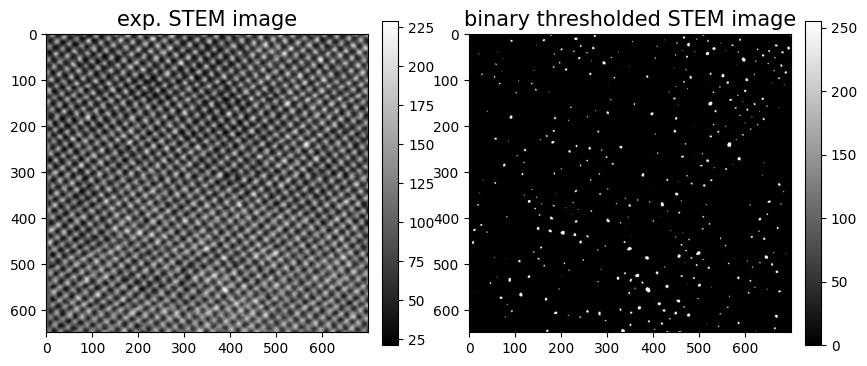

In [ ]:
mask = img_mask.single_mask(
    img_raw_pth = str(files('srosignal.demo')/'stem_raw.bmp'),
    int_range_convert = np.array([[170, 255, 255],]),
    img_savpth = 'srosignal/demo',
)

binary_img_buffer = mask.main_img()

img_raw = mask.img_raw 
binary_img = binary_img_buffer[0]

fig, axs = plt.subplots(1,2, figsize=(10,5))
haadf_display = axs[0].imshow(img_raw, cmap='gray')
axs[0].set_title('experimental STEM image', fontsize = 15)
abf_display = axs[1].imshow(binary_img, cmap='gray')
axs[1].set_title(f'binary thresholded STEM image', fontsize = 15)

fig.colorbar(haadf_display, ax=axs[0], orientation='vertical', fraction=0.046, pad=0.04)
fig.colorbar(abf_display, ax=axs[1], orientation='vertical', fraction=0.046, pad=0.04)

Extract atomic coordinates (unit in pixels) from binary STEM image.

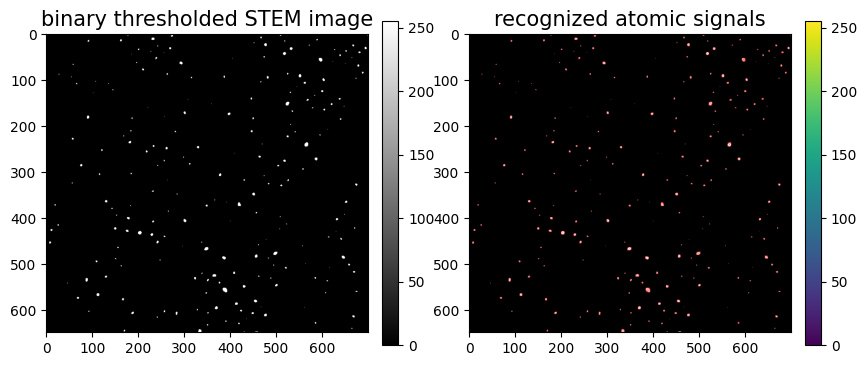

In [3]:
extract = recog_coord.extract(
    img_raw_pth = str(files('srosignal.demo')/'stem_binarythreshold.bmp'),
    grid_size = 6,
    mp_core = 54,
    centre_maxdis = 0,
    
    dot_radius = 2,
    dot_color = (0,0,255),
    dot_thickness = 1,
    alpha = 0.5,
    img_savpth = 'srosignal/demo/test',
)
extract.plotting()

img_raw = extract.img_raw
img_dotted = extract.img_color

fig, axs = plt.subplots(1,2, figsize=(10,5))
haadf_display = axs[0].imshow(img_raw, cmap='gray')
axs[0].set_title('binary thresholded STEM image', fontsize = 15)
abf_display = axs[1].imshow(cv2.cvtColor(img_dotted, cv2.COLOR_BGR2RGB))
axs[1].set_title(f'recognized atomic signals', fontsize = 15)

fig.colorbar(haadf_display, ax=axs[0], orientation='vertical', fraction=0.046, pad=0.04)
fig.colorbar(abf_display, ax=axs[1], orientation='vertical', fraction=0.046, pad=0.04)

Extract ordering information from binary thresholded experimental scanning transmission electron microscopy (STEM) image.

Image saved at:  srosignal/demo/_real_pure_polygon.bmp
polygon statistics: {'tri37-143': 20.0, 'tri53-127': 17.0, 'square': 9.0}


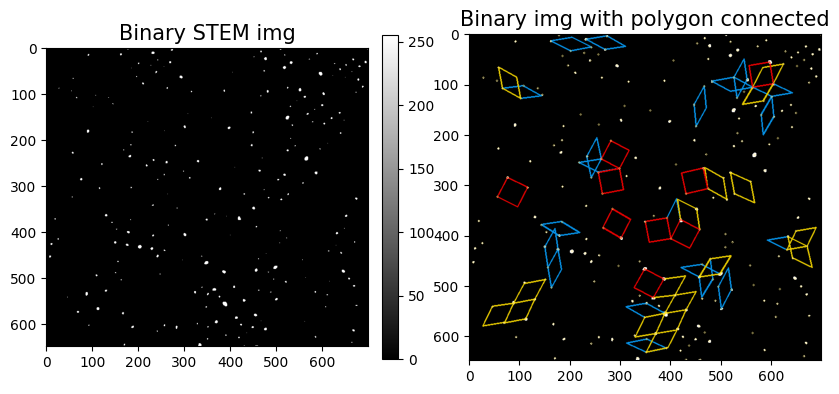

In [8]:
 #* use demonstration data including 
 #* binary thresholded image and recognized atomic coordinates
 #* and polygon definition
poly_count, img_polyconnect, img_raw = srosignal.poly_extract(
    
    img_raw_pth = str(files('srosignal.demo')/'stem_binarythreshold.bmp'),
    stem_coords_threshold_pth = str(files('srosignal.demo')/'stem_binarythreshold_coords.npy'),
    stem_coords_all_pth = None,
    inv_filter = False,
    
    # img_raw_pth = str(files('srosignal.demo')/'stem_binarythreshold_inv.bmp'),
    # stem_coords_threshold_pth = str(files('srosignal.demo')/'stem_binarythreshold_coords_inv.npy'),
    # stem_coords_all_pth = str(files('srosignal.demo')/'stem_all_coords_inv.npy'),
    # inv_filter = True,

    polygon_type_list = ['tri37-143', 'tri53-127', 'square'],
    
    mp_core = 54,
    l_range = [10, 80],
    max_lengthdiff = 3,
    max_anglediff = 3,
    poly_def = json.load(open(str(files('srosignal.demo')/'poly_definition.json'), 'r')),
    allow_dot_in_pattern = False,
    
    #* painting options
    line_thickness_t = 2,
    line_thickness_v = 2,
    atol = 4,
    allow_virtual_vertex = True,
    alpha = 0.1,
    img_savpth = 'srosignal/demo',
)

print(f'polygon statistics: {poly_count}')

fig, axs = plt.subplots(1,2, figsize=(10,5))
haadf_display = axs[0].imshow(img_raw, cmap = 'gray')
axs[0].set_title('Binary STEM img', fontsize = 15)
abf_display = axs[1].imshow(cv2.cvtColor(img_polyconnect, cv2.COLOR_BGR2RGB))
axs[1].set_title(f'Binary img with polygon connected', fontsize = 15)

fig.colorbar(haadf_display, ax=axs[0], orientation='vertical', fraction=0.046, pad=0.04)

In [2]:
img_polyconnect

NameError: name 'img_polyconnect' is not defined

In [ ]:
plt.imshow()